<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/kassie-preprocessing/skipped-padded/clustering_pipeline/padded_skipped_fourier_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [3]:
skipped_values = np.load('/content/drive/My Drive/capstone/skipped_values_fourier.npy')
consecutive_values = np.load('/content/drive/My Drive/capstone/consecutive_values_fourier.npy')

In [4]:
skipped_values_original = np.load('/content/drive/My Drive/capstone/skipped_values.npy')
consecutive_values_original = np.load('/content/drive/My Drive/capstone/consecutive_values.npy')

In [5]:
!pip install tslearn

# **1.Skipped Fourier** 

In [6]:
from tslearn.clustering import TimeSeriesKMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
#Skipped values
num_clus = 6
km_skipped = TimeSeriesKMeans(n_clusters=num_clus, max_iter=5,random_state=0).fit(skipped_values)
clusters_skipped = km_skipped.predict(skipped_values)

In [8]:
#Dictionnaries with keys = clusters, values = list of the chunks in that cluster
dict_skipped = {}

for i in range(0,num_clus):
  dict_skipped[i] = list()

for ind, arr in enumerate(skipped_values_original):
  dict_skipped[clusters_skipped[ind]].append(arr)

In [9]:
copy_skipped = dict_skipped.copy()

In [10]:
#Number of chunks in each cluster
clusters_n = [len(j) for j in dict_skipped.values()]
clusters_n

[723, 984, 521, 557, 669, 546]

In [11]:
#Create a dataframe with each column = mean of the values of each chunk in the cluster for that day
for i in range(0,num_clus):
  #Concatenate all arrays into dataframe
  dict_skipped[i] = pd.DataFrame(np.concatenate(dict_skipped[i], axis=1)).replace(0,np.nan) 

for i in range(0,num_clus):
  #Compute the mean for each scale
  col_con = dict_skipped[i].loc[:,0::3]
  col_2s = dict_skipped[i].loc[:,1::3]
  col_3s = dict_skipped[i].loc[:,2::3]

  dict_skipped[i] = pd.concat([col_con.mean(axis=1), col_2s.mean(axis=1), col_3s.mean(axis=1)], axis =1).replace(np.nan, 0)
  dict_skipped[i].columns = ['consecutive_mean', 'two_step_mean', 'three_step_mean']

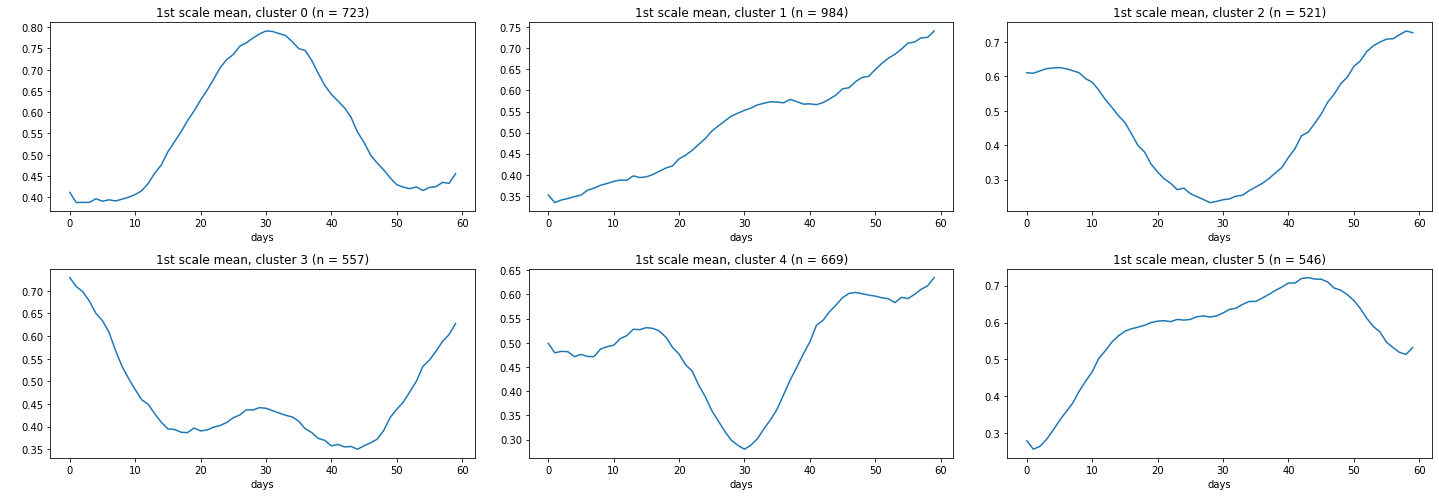

In [12]:
#Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize = (20,7))

for i in range(0,num_clus):
  if i < 3:
    sns.lineplot(data = dict_skipped[i]['consecutive_mean'], ax = ax[0, int(i)])
    ax[0,int(i)].set_title('1st scale mean, cluster ' + str(i) + ' (n = '+ str(clusters_n[int(i)])+')')
    ax[0,int(i)].set_ylabel(' ')
    ax[0,int(i)].set_xlabel('days')
  
  else:
    sns.lineplot(data = dict_skipped[i]['consecutive_mean'], ax = ax[1, int(3-i)])
    ax[1,int(i-3)].set_title('1st scale mean, cluster ' + str(i) + ' (n = '+ str(clusters_n[int(i)])+')')
    ax[1,int(i-3)].set_ylabel(' ')
    ax[1,int(i-3)].set_xlabel('days')

plt.tight_layout()

# **2. Padded Fourier** 

In [13]:
#Consecutive values
km_consecutive = TimeSeriesKMeans(n_clusters=num_clus, max_iter=5,random_state=0).fit(consecutive_values)
clusters_consecutive = km_consecutive.predict(consecutive_values)

In [14]:
#Dictionnaries with keys = clusters, values = list of the chunks in that cluster
dict_cons = {}

for i in range(0,num_clus):
  dict_cons[i] = list()

for ind, arr in enumerate(consecutive_values_original):
  dict_cons[clusters_consecutive[ind]].append(arr)

In [15]:
copy_consecutive = dict_cons.copy()

In [16]:
#Number of chunks in each cluster
clusters_n_cons = [len(j) for j in dict_cons.values()]
clusters_n_cons

[729, 796, 561, 482, 644, 788]

In [17]:
#Create a dataframe with each column = mean of the values of each chunk in the cluster for that day
for i in range(0,num_clus):
  #Concatenate all arrays into dataframe
  dict_cons[i] = pd.DataFrame(np.concatenate(dict_cons[i], axis=1)).replace(0,np.nan) 

for i in range(0,num_clus):
  #Compute the mean for each scale
  col_20 = dict_cons[i].loc[:,0::3]
  col_40 = dict_cons[i].loc[:,1::3]
  col_60 = dict_cons[i].loc[:,2::3]

  dict_cons[i] = pd.concat([col_20.mean(axis=1), col_40.mean(axis=1), col_60.mean(axis=1)], axis =1).replace(np.nan, 0)
  dict_cons[i].columns = ['20d_mean', '40d_mean', '60d_mean']

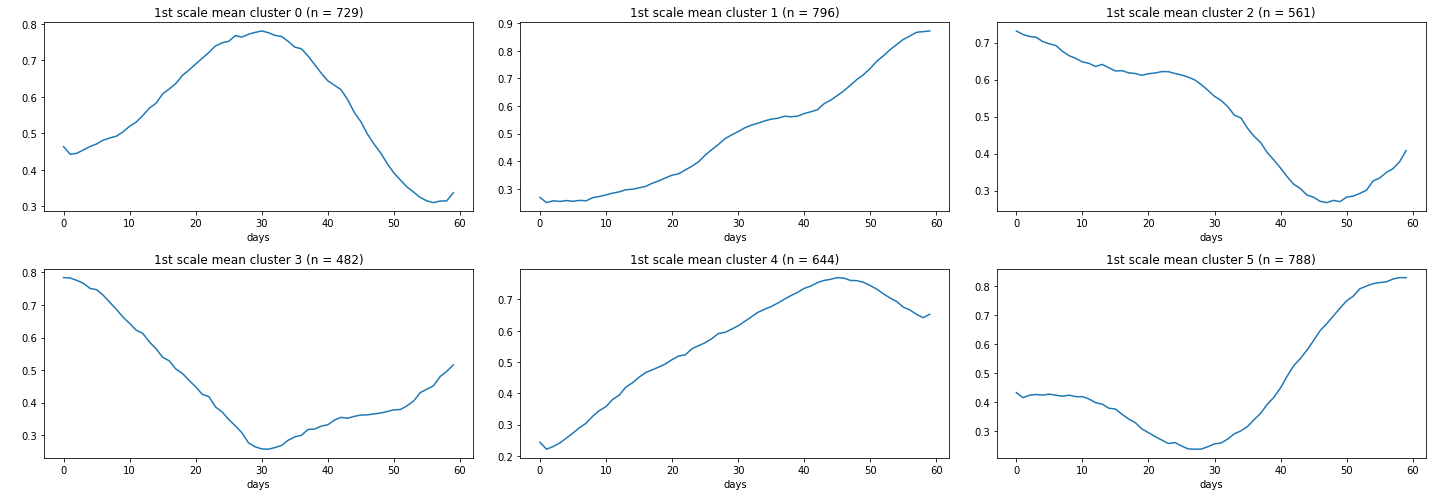

In [18]:
#Plotting the results
fig, ax = plt.subplots(2, 3, figsize = (20,7))

for i in dict_cons.keys():
  if i < 3:
    sns.lineplot(data = dict_cons[i]['60d_mean'], ax = ax[0, int(i)])
    ax[0,int(i)].set_title('1st scale mean cluster ' + str(i) + ' (n = '+ str(clusters_n_cons[int(i)])+')')
    ax[0,int(i)].set_ylabel(' ')
    ax[0,int(i)].set_xlabel('days')

  else:
    sns.lineplot(data = dict_cons[i]['60d_mean'], ax = ax[1, int(3-i)])
    ax[1,int(i-3)].set_title('1st scale mean cluster ' + str(i) + ' (n = '+ str(clusters_n_cons[int(i)])+')')
    ax[1,int(i-3)].set_ylabel(' ')
    ax[1,int(i-3)].set_xlabel('days')

plt.tight_layout()

# **Silhouette Score Analysis**



In [19]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2)


In [20]:
def flatten(X):
  return np.array([np.concatenate((i[:,0], i[:,1], i[:,2]), axis=None) for i in X])

# Skipped final Silhouette score


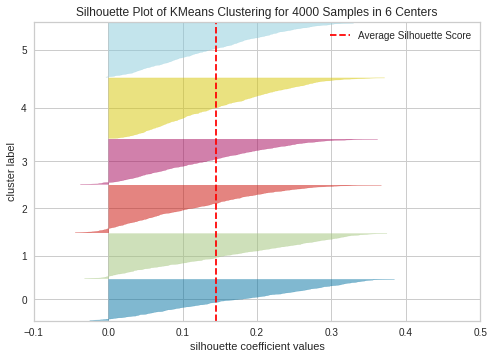

In [21]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

model_sil = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model_sil, colors='yellowbrick')
visualizer.fit(flatten(skipped_values)) 
visualizer.show()

In [22]:
visualizer.silhouette_score_

0.14522402316499136

# Padded Values final silhouette


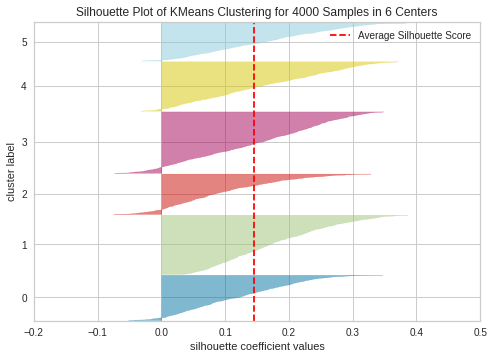

In [23]:
model_sil = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model_sil, colors='yellowbrick')
visualizer.fit(flatten(consecutive_values)) 
visualizer.show()

In [24]:
visualizer.silhouette_score_

0.14572504564799157

# Multiscale Analysis

In [25]:
!pip install python-fastpip

helper functions

In [26]:
import numpy 
from fastpip import pip

## these are so help functions 
def one_dimention_skipped(X):
  return [i[:,0] for i in X]

def one_dimention_cons(X):
  return [i[:,2] for i in X]

def reduce_dimension(context, dim):
    embed_matrix = np.empty(shape=[0, dim])
    # Going through each row of the context scale and reduce its dimension
    for i in range(context.shape[0]):
        x = np.arange(1, context.shape[1] + 1)  
        y = context[i,:]
        sample = [(a,b) for a, b in zip(x,y)]
        reduce_sample = pip(sample, dim)
        result = [a[1] for a in reduce_sample]
        
        embed_matrix = np.append(embed_matrix, np.asarray(result).reshape(1,-1), axis =0)
    return embed_matrix

def label_motif_general(window):
  s = window
  sort_index = numpy.argsort(s)
  sort_index = [1+i for i in sort_index]
  m='motif_'
  for i in sort_index:
    m = '{}{}'.format(m,i)
  return(m) 

def motif_dictionary(x):
  list_motif = ["motif_123","motif_132","motif_213","motif_231","motif_321","motif_312"]
  dict_3_motifs =dict(zip(list_motif,[0]*len(list_motif)))
  # find the motifs and add them in a dictionary
  for i in x:
    label = label_motif_general(i)
    if label in dict_3_motifs.keys():
      dict_3_motifs[label] = dict_3_motifs[label] + 1
    else:
      dict_3_motifs[label] = 0
  return dict_3_motifs


def transform_to_3_pip(A):
  size = 3
  step = 1
  A = [A[i : i + size] for i in range(0, len(A), step)]
  result = []
  for i in A:
    if len(i) < 3:
      continue
    result.append(i)
  return result

def create_new_list(x):
  new = []
  for i in x:
    new.append(transform_to_3_pip(i))

  flat_list = [item for sublist in new for item in sublist]
  return flat_list

def normalize(dict_3_motifs):
  d=dict(dict_3_motifs)
  factor=1.0/sum(d.values())
  for k in d:
    d[k] = d[k]*factor
  return d

# Consecutive  Multiscale





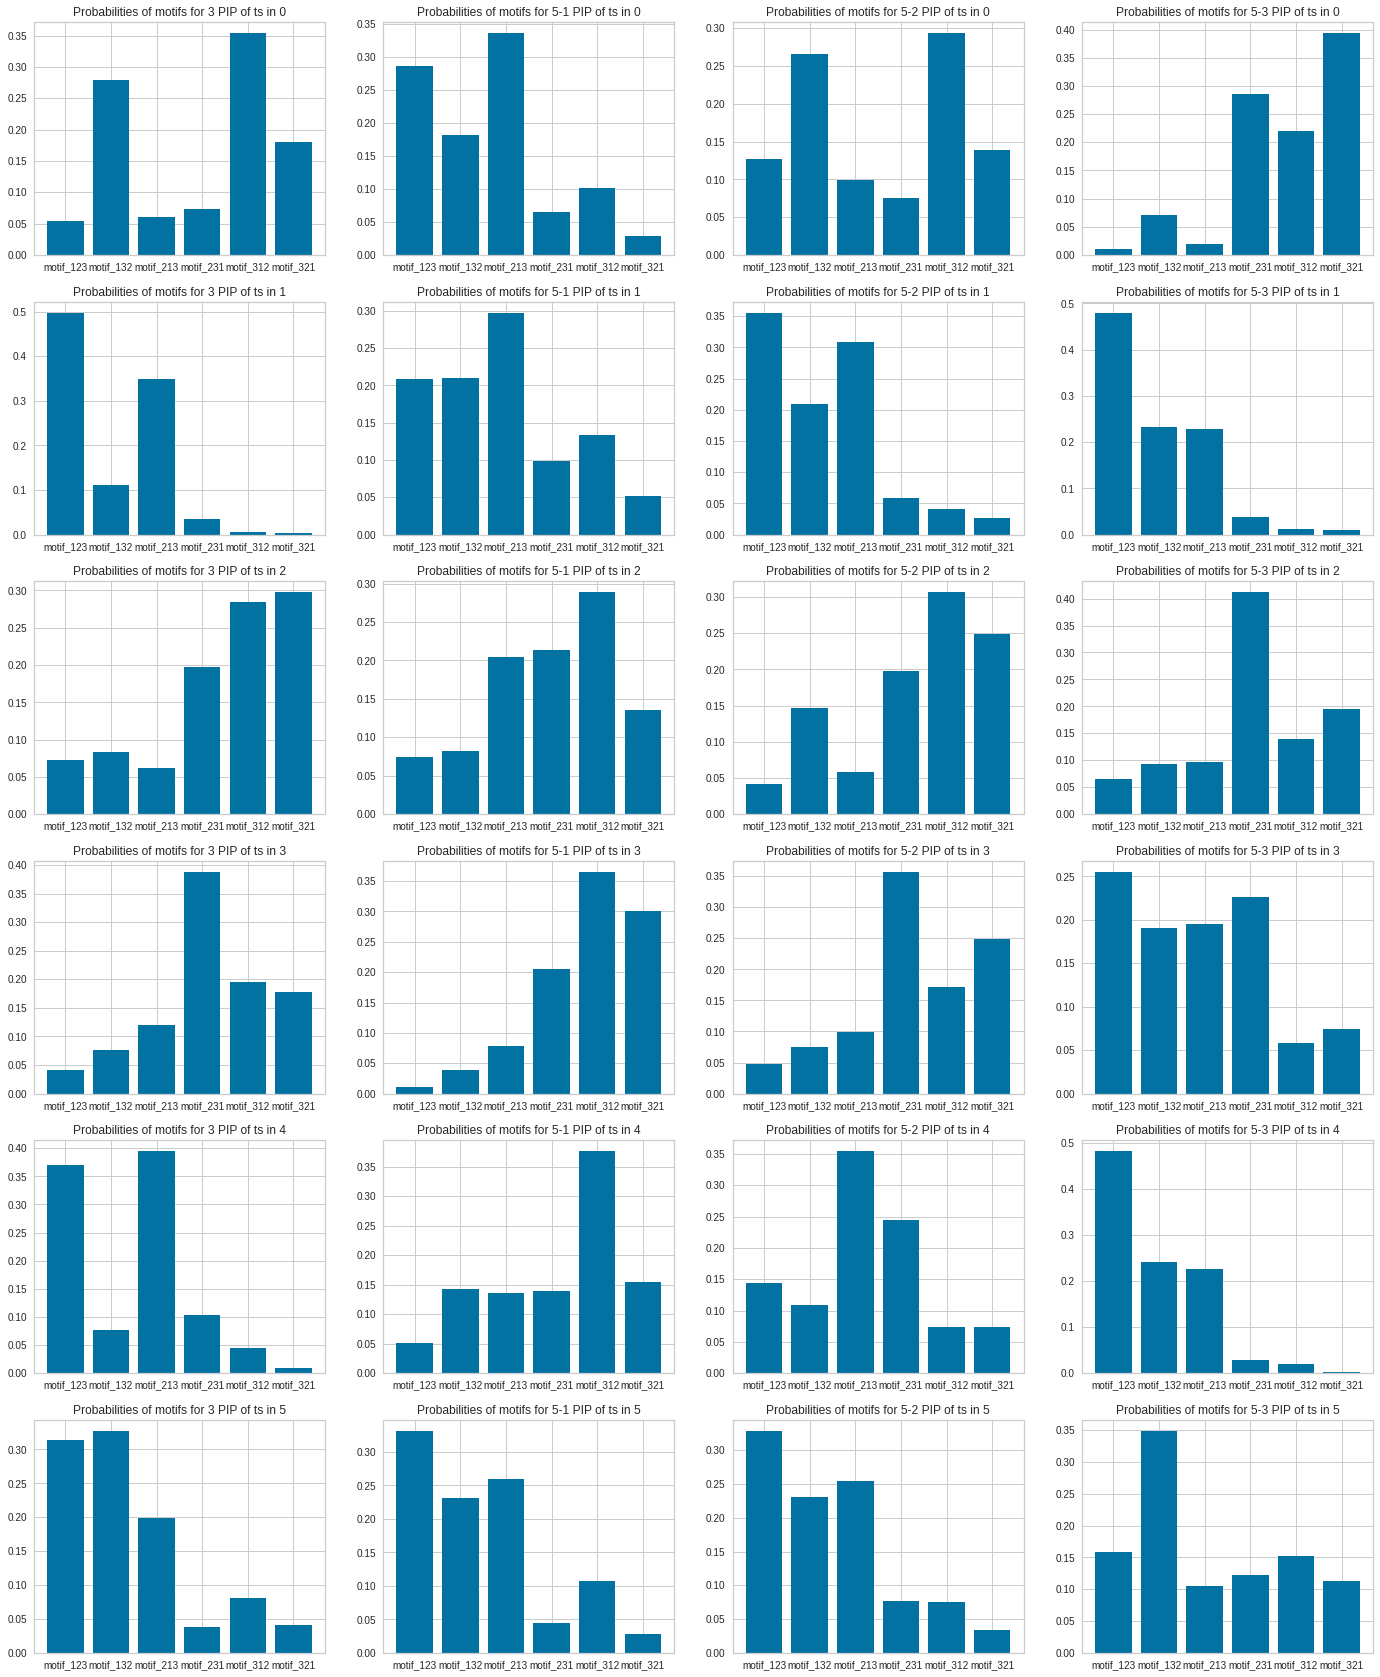

In [27]:
import collections

n_clusters = 6
ncols = 4
nrows = n_clusters

ncols = 4
nrows = n_clusters
fig, ax = plt.subplots(nrows=n_clusters, ncols=4, figsize=(6*ncols, 5*nrows))

for cluster in range(n_clusters):
  
  copy_skipped_1d = one_dimention_cons(copy_consecutive[cluster])
  
  # reduce dimentions of each ts to 3
  pip_3 = reduce_dimension(np.array(copy_skipped_1d),3)
  # get 3 dim motifs count
  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_3).items()))
  ax[cluster,0].bar(list(dict_motifs.keys()), list(normalize(dict_motifs).values()))
  ax[cluster,0].title.set_text('Probabilities of motifs for 3 PIP of ts in '+str(cluster))

  # reduce dimentions of each ts to 5
  pip_5 = reduce_dimension(np.array(copy_skipped_1d),5)
  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_5[:,:3]).items()))
  ax[cluster,1].bar(list(dict_motifs.keys()), np.array(list(dict_motifs.values())) / len(copy_skipped_1d) )
  ax[cluster,1].title.set_text('Probabilities of motifs for 5-1 PIP of ts in '+str(cluster))

  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_5[:,1:4]).items()))
  ax[cluster,2].bar(list(dict_motifs.keys()), np.array(list(dict_motifs.values())) / len(copy_skipped_1d) )
  ax[cluster,2].title.set_text('Probabilities of motifs for 5-2 PIP of ts in '+str(cluster))

  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_5[:,2:]).items()))
  ax[cluster,3].bar(list(dict_motifs.keys()), np.array(list(dict_motifs.values())) / len(copy_skipped_1d) )
  ax[cluster,3].title.set_text('Probabilities of motifs for 5-3 PIP of ts in '+str(cluster))

# Skipped Multiscale

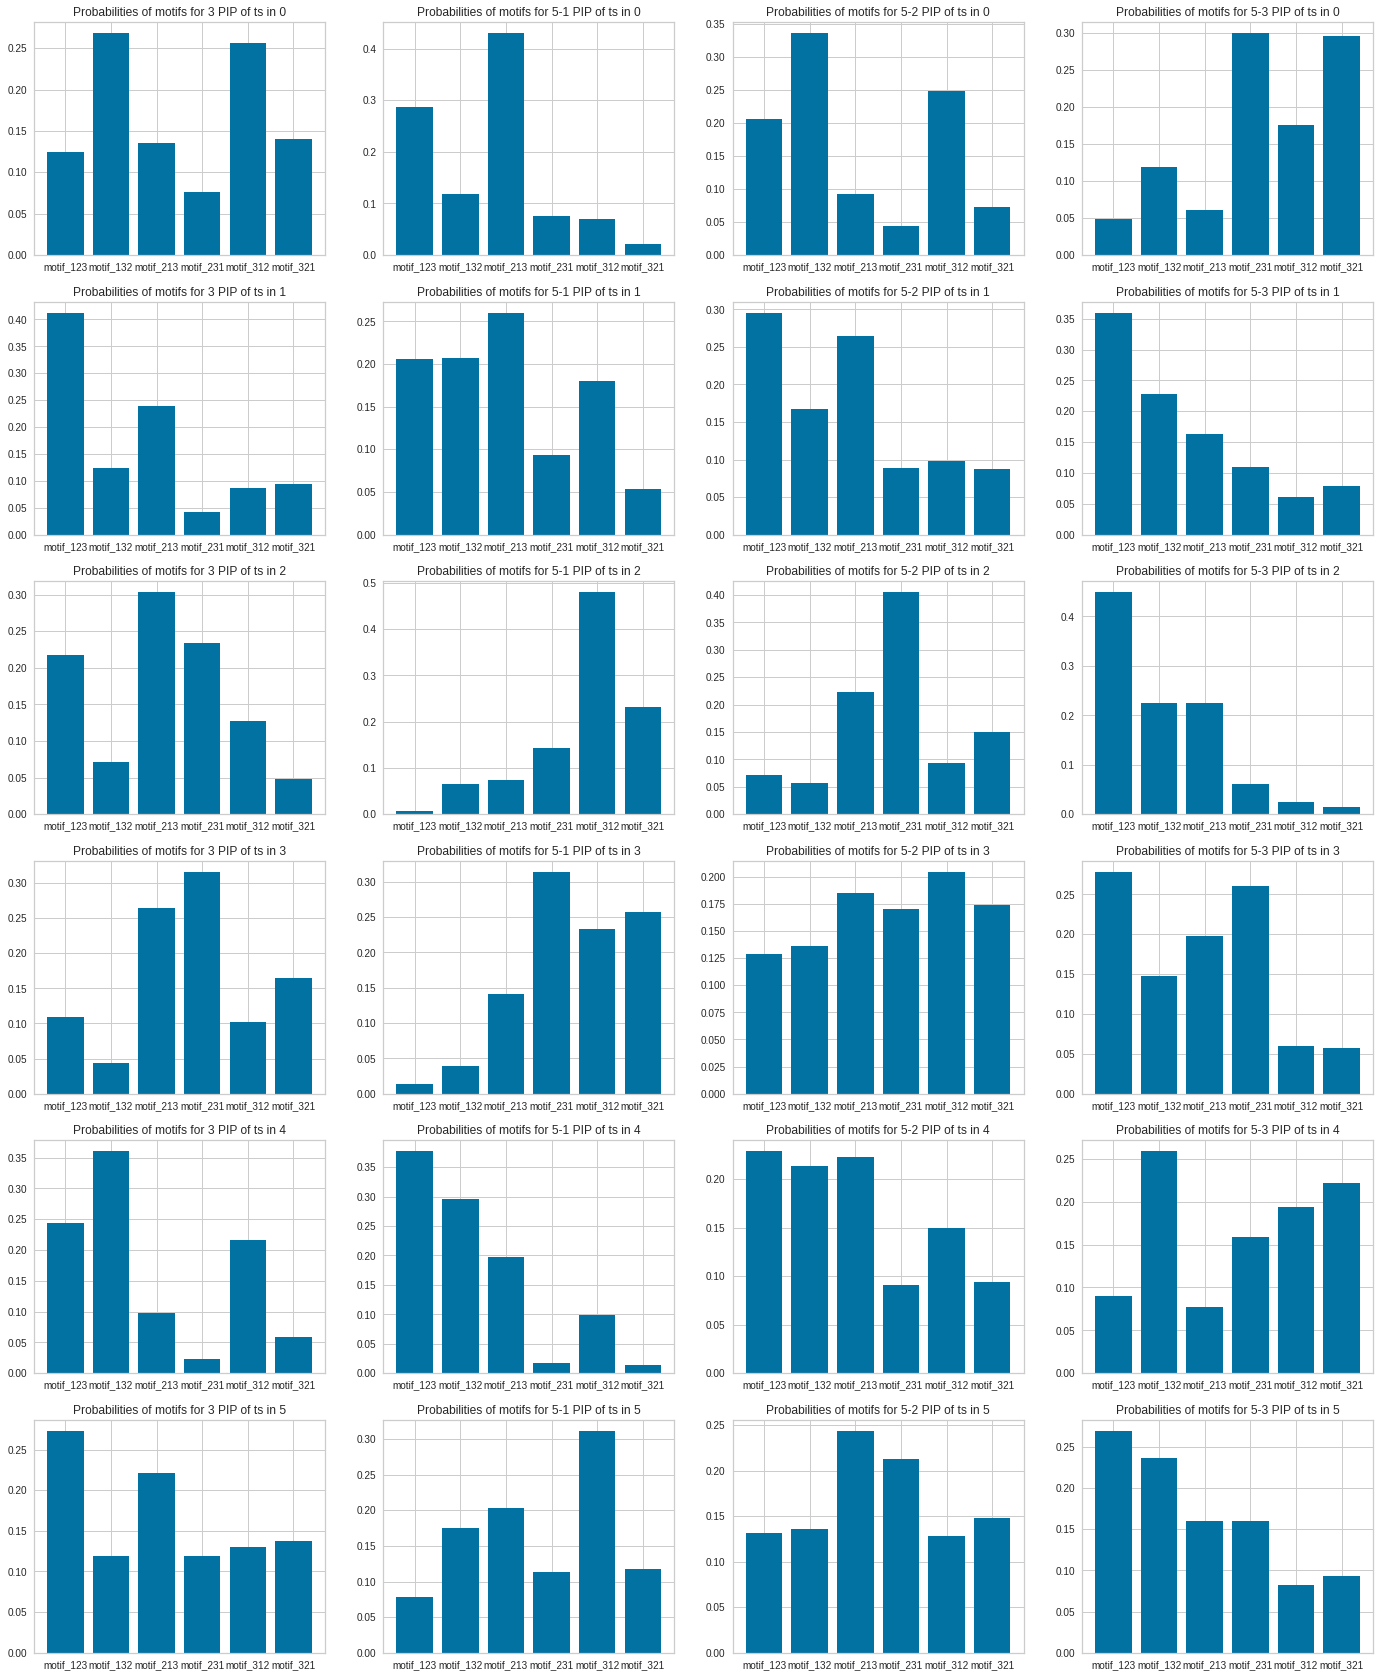

In [28]:
import collections

n_clusters = 6
ncols = 4
nrows = n_clusters

ncols = 4
nrows = n_clusters
fig, ax = plt.subplots(nrows=n_clusters, ncols=4, figsize=(6*ncols, 5*nrows))

for cluster in range(n_clusters):
  
  copy_skipped_1d = one_dimention_skipped(copy_skipped[cluster])
  
  # reduce dimentions of each ts to 3
  pip_3 = reduce_dimension(np.array(copy_skipped_1d),3)
  # get 3 dim motifs count
  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_3).items()))
  ax[cluster,0].bar(list(dict_motifs.keys()), list(normalize(dict_motifs).values()))
  ax[cluster,0].title.set_text('Probabilities of motifs for 3 PIP of ts in '+str(cluster))

  # reduce dimentions of each ts to 5
  pip_5 = reduce_dimension(np.array(copy_skipped_1d),5)
  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_5[:,:3]).items()))
  ax[cluster,1].bar(list(dict_motifs.keys()), np.array(list(dict_motifs.values())) / len(copy_skipped_1d) )
  ax[cluster,1].title.set_text('Probabilities of motifs for 5-1 PIP of ts in '+str(cluster))

  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_5[:,1:4]).items()))
  ax[cluster,2].bar(list(dict_motifs.keys()), np.array(list(dict_motifs.values())) / len(copy_skipped_1d) )
  ax[cluster,2].title.set_text('Probabilities of motifs for 5-2 PIP of ts in '+str(cluster))

  dict_motifs = od = collections.OrderedDict(sorted(motif_dictionary(pip_5[:,2:]).items()))
  ax[cluster,3].bar(list(dict_motifs.keys()), np.array(list(dict_motifs.values())) / len(copy_skipped_1d) )
  ax[cluster,3].title.set_text('Probabilities of motifs for 5-3 PIP of ts in '+str(cluster))